## Final Project Submission

Please fill out:
* Student name: Yesim Cebeci
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Matt Carr
* Blog post URL:


# Overview 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.I am charged with exploring what types of films are currently doing the best at the box office.I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

In this analysis, I will perform an analysis on a large data set of approximately 3,000
movies. The data includes many different types of information about each movie, ranging from
the  the director, the studio, the genre to other information like the budget, the box office
earnings from different datas. I will analyze this data set to
determine what contributes to a movie being a “success”. For this analysis, I will define success
in financial terms, basing the success of a movie on the amount of money it earns in
comparison to the movie’s budget.

# Business Problem 

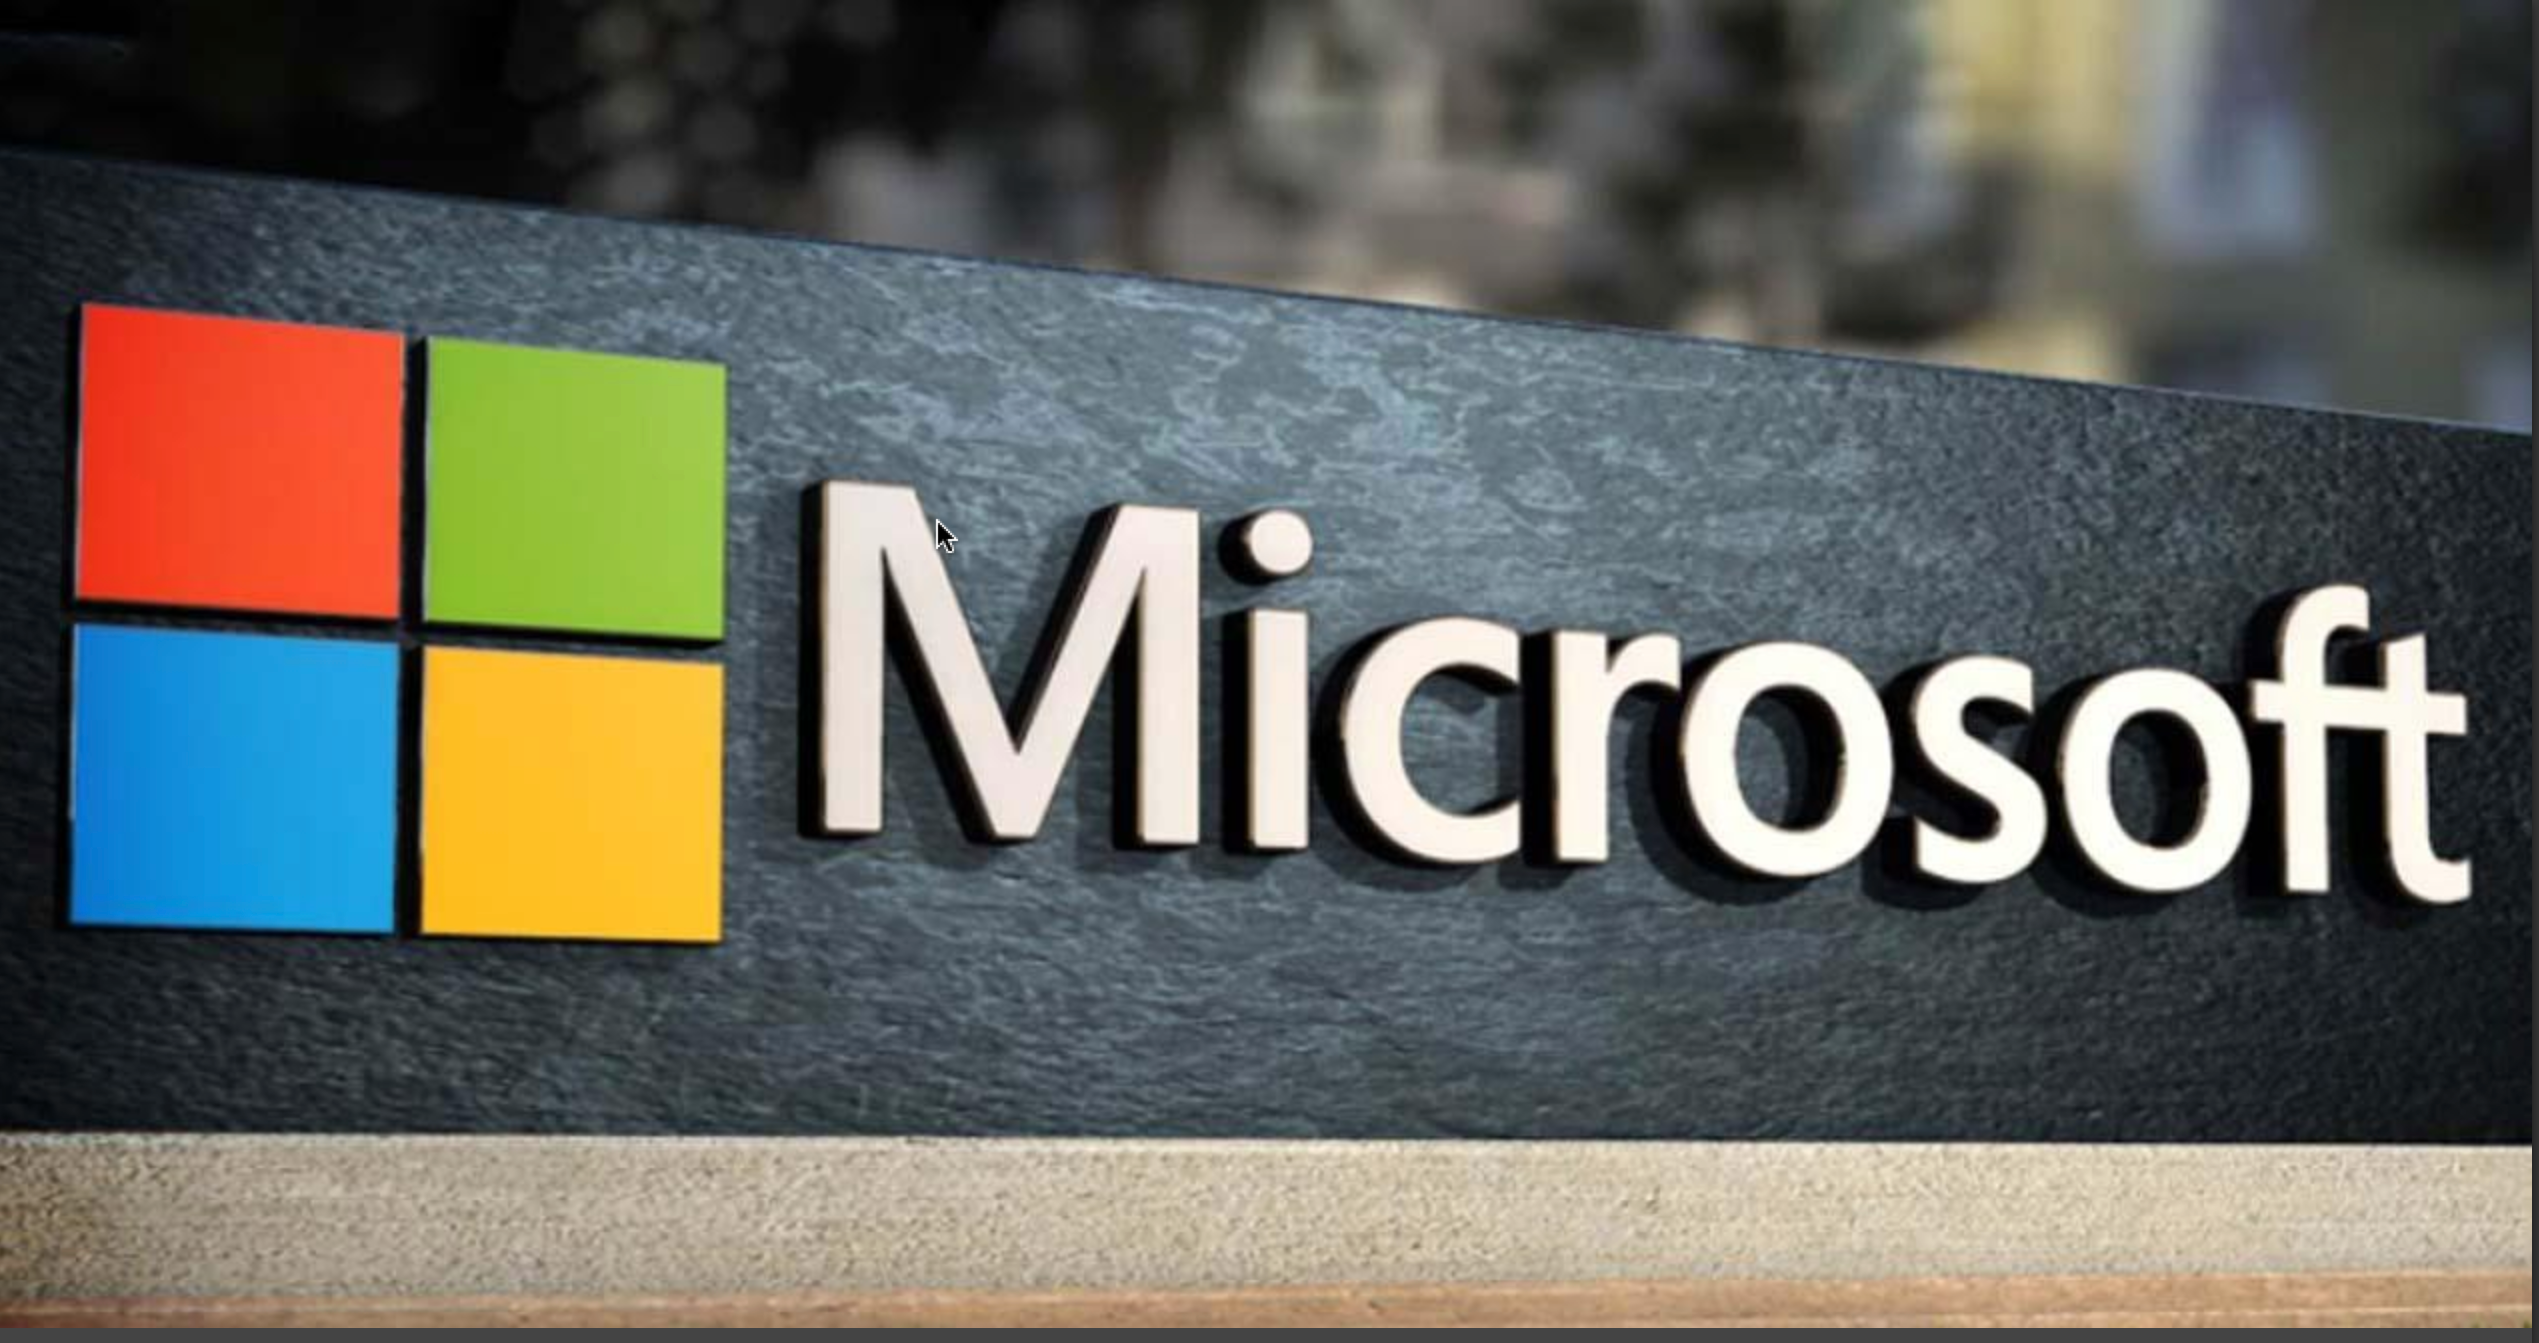

I provided datasets for this analysis from imbd , rotten tomatoes and box office mojo websites. The
original datasets contained information about 11 data files which have more then 100000 data movies. I decided to use 6 different datasets and decided to focus on three categories:
1) Genres 2) Studios 3) Directors

For those 3 catagories I decided to sort by ROI, Budget and Numbers to make some prediction and recommendation

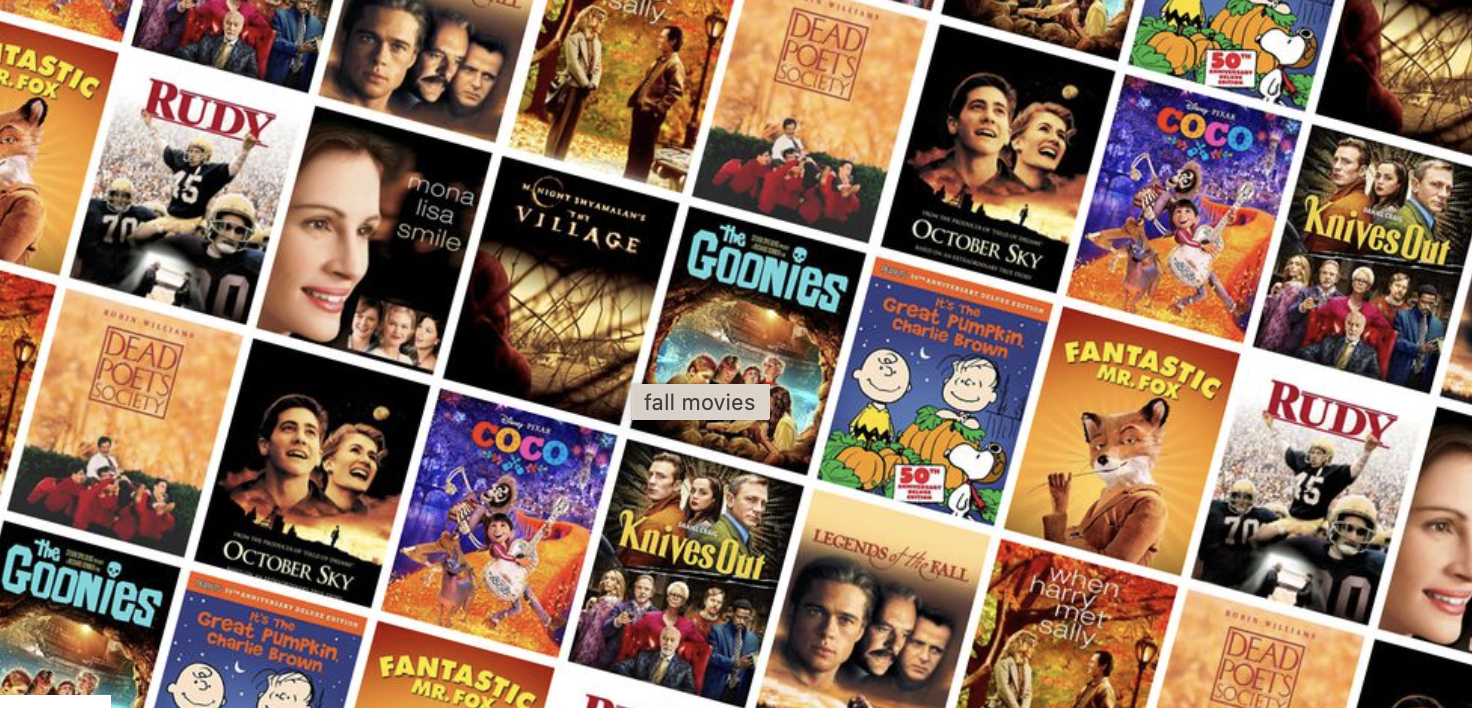

# Data Understanding 

I will start by importing all the necessary libraries and loading data files  to start understanding data

In [2]:
import pandas as pd
# I ll format the float numbers in order to get rid of scientific notation
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# I will use this dataset to get movies and genres data
imdb_title_basics=pd.read_csv('./Data/imdb.title.basics.csv')
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013           175.00    Action,Crime,Drama  
1        2019           114.00       Biography,Drama  
2        2018           122.00                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017            80.00  Comedy,Drama,Fantasy

In [4]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [6]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [7]:
# I will use this dataset to get director names (primary_name) and primary_profession data
imdb_name_basic=pd.read_csv('./Data/imdb.name.basics.csv')
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [8]:
imdb_name_basic['primary_name'].value_counts()

Michael Brown          16
James Brown            16
David Brown            15
Michael Johnson        14
Dinesh                 13
                       ..
Glenn German            1
Clifford Fields         1
Joanna Perry-Folino     1
Stefan Hahn             1
Pegasus Envoyé          1
Name: primary_name, Length: 577203, dtype: int64

In [9]:
# I will need this dataset later to merge tables for director name!
imdb_title_principals=pd.read_csv('./Data/imdb.title.principals.csv')
imdb_title_principals.head()

tconst  ordering     nconst  category       job        characters
0  tt0111414         1  nm0246005     actor       NaN       ["The Man"]
1  tt0111414         2  nm0398271  director       NaN               NaN
2  tt0111414         3  nm3739909  producer  producer               NaN
3  tt0323808        10  nm0059247    editor       NaN               NaN
4  tt0323808         1  nm3579312   actress       NaN  ["Beth Boothby"]

In [10]:
# I will use this dataset for studios
bom_movie_gross=pd.read_csv('./Data/bom.movie_gross.csv')
bom_movie_gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV    415000000.00   
1                   Alice in Wonderland (2010)     BV    334200000.00   
2  Harry Potter and the Deathly Hallows Part 1     WB    296000000.00   
3                                    Inception     WB    292600000.00   
4                          Shrek Forever After   P/DW    238700000.00   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [11]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [13]:
bom_movie_gross['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [14]:
# directors
imdb_title_crew=pd.read_csv('./Data/imdb.title.crew.csv.gz')
imdb_title_crew.head()

tconst                      directors              writers
0  tt0285252                      nm0899854            nm0899854
1  tt0438973                            NaN  nm0175726,nm1802864
2  tt0462036                      nm1940585            nm1940585
3  tt0835418                      nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [15]:
#I ll use this dataset to calculate ROI, and will get production budget and gross of each movie  
movie_budget=pd.read_csv('./Data/tn.movie_budgets.csv')
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [16]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

it looks some of 'genres' columns have several categories. First of all, l need to apply explode methods to split them. But before do that I used str.split method to make list them!

In [17]:
imdb_title_basics['genres']=imdb_title_basics['genres'].map(str)
imdb_title_basics['genres']=imdb_title_basics['genres'].str.split(",")
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                    genres  
0        2013           175.00    [Action, Crime, Drama]  
1        2019           114.00        [Biography, Drama]  
2        2018           122.00                   [Drama]  
3        2018              NaN           [Comedy, Drama]  
4        2017            80.00  [Comedy, Drama, Fantasy]

In [18]:
# explode the genres column so that multiple genres can be assigned to the same movie
imdb_title_basics= imdb_title_basics.assign(genres=imdb_title_basics['genres'].explode('genres'))
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes     genres  
0        2013           175.00     Action  
1        2019           114.00      Crime  
2        2018           122.00      Drama  
3        2018              NaN  Biography  
4        2017            80.00      Drama

Same things for'directors' columns have several categories.l need to apply same methods for 'directors' column in order to merge table safely

In [19]:
imdb_title_crew['directors']=imdb_title_crew['directors'].map(str)
imdb_title_crew['directors']=imdb_title_crew['directors'].str.split(",")
imdb_title_crew.head()

tconst                          directors              writers
0  tt0285252                        [nm0899854]            nm0899854
1  tt0438973                              [nan]  nm0175726,nm1802864
2  tt0462036                        [nm1940585]            nm1940585
3  tt0835418                        [nm0151540]  nm0310087,nm0841532
4  tt0878654  [nm0089502, nm2291498, nm2292011]            nm0284943

In [20]:
# explode the directors column so that multiple directors can be assigned to the same movie
imdb_title_crew= imdb_title_crew.assign(directors=imdb_title_crew['directors'].explode('directors'))
imdb_title_crew.head()

tconst  directors              writers
0  tt0285252  nm0899854            nm0899854
1  tt0438973        nan  nm0175726,nm1802864
2  tt0462036  nm1940585            nm1940585
3  tt0835418  nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502            nm0284943

And also I applied same method for primary proffesion column. Then in this column I ll extract 'director' to get only director's name

In [21]:
imdb_name_basic['primary_profession'] = imdb_name_basic['primary_profession'].map(str)
imdb_name_basic['primary_profession'] = imdb_name_basic['primary_profession'].str.split(",")
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                  primary_profession  \
0      [miscellaneous, production_manager, producer]   
1     [composer, music_department, sound_department]   
2                     [miscellaneous, actor, writer]   
3  [camera_department, cinematographer, art_depar...   
4  [production_designer, art_department, set_deco...   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [22]:
imdb_name_basic = imdb_name_basic.assign(primary_profession=imdb_name_basic
                                        ['primary_profession'].explode('primary_profession'))
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  primary_profession  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN       miscellaneous   
1  nm0061865       Joseph Bauer         NaN         NaN  production_manager   
2  nm0062070         Bruce Baum         NaN         NaN            producer   
3  nm0062195       Axel Baumann         NaN         NaN            composer   
4  nm0062798        Pete Baxter         NaN         NaN    music_department   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [23]:
exploded_directors = imdb_name_basic[imdb_name_basic['primary_profession'].str.contains('director')]
exploded_directors.head(5)

nconst      primary_name  birth_year  death_year primary_profession  \
15  nm0066163    Arnaud Bedouët         NaN         NaN           director   
26  nm0069605  Bruno Beltramini         NaN         NaN           director   
41  nm0075049    Urban Bergsten         NaN         NaN           director   
43  nm0076139    Andrée Bernard     1966.00         NaN           director   
51  nm0081255    Andreas Bieber     1966.00         NaN           director   

                           known_for_titles  
15  tt1355327,tt1977735,tt0173525,tt1710520  
26  tt2154648,tt3746684,tt3746660,tt0427317  
41  tt4390908,tt2256570,tt6014434,tt8284860  
43  tt0112004,tt0104036,tt0103939,tt0081912  
51  tt1822255,tt1163326,tt0108985,tt0164630

In [24]:
exploded_directors['primary_profession'].value_counts()

director              70906
assistant_director     9553
art_director           2831
casting_director       1451
Name: primary_profession, dtype: int64

In [25]:
exploded_directors1 = imdb_name_basic[imdb_name_basic['primary_profession']== 'director']
exploded_directors1.head(5)

nconst      primary_name  birth_year  death_year primary_profession  \
15  nm0066163    Arnaud Bedouët         NaN         NaN           director   
26  nm0069605  Bruno Beltramini         NaN         NaN           director   
41  nm0075049    Urban Bergsten         NaN         NaN           director   
43  nm0076139    Andrée Bernard     1966.00         NaN           director   
51  nm0081255    Andreas Bieber     1966.00         NaN           director   

                           known_for_titles  
15  tt1355327,tt1977735,tt0173525,tt1710520  
26  tt2154648,tt3746684,tt3746660,tt0427317  
41  tt4390908,tt2256570,tt6014434,tt8284860  
43  tt0112004,tt0104036,tt0103939,tt0081912  
51  tt1822255,tt1163326,tt0108985,tt0164630

In [26]:
exploded_directors1['primary_profession'].value_counts()

director    70906
Name: primary_profession, dtype: int64

This budgets dataframe needs a little cleaning, getting rid of the dollar signs, converting type integer to calculate ROI

In [27]:
#convert the values to integer
movie_budget["worldwide_gross"] = movie_budget["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)
movie_budget["domestic_gross"] = movie_budget["domestic_gross"].replace("[\$,]", "", regex=True).astype(int)
movie_budget["production_budget"] = movie_budget["production_budget"].replace("[\$,]", "", regex=True).astype(int)
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747

In [28]:
#create a new column that calculates ROI (return on investment)
movie_budget["ROI"] = ((movie_budget["worldwide_gross"] - movie_budget["production_budget"]
                       )/movie_budget["production_budget"])*100
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross    ROI  
0          425000000       760507625       2776345279 553.26  
1          410600000       241063875       1045663875 154.67  
2          350000000        42762350        149762350 -57.21  
3          330600000       459005868       1403013963 324.38  
4          317000000       620181382       1316721747 315.37

In [29]:
#I will extract year from date in case of need sorting by year
movie_budget['release_year'] = movie_budget['release_date'].str[-4:].astype(int)
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross    ROI  release_year  
0          425000000       760507625       2776345279 553.26          2009  
1          410600000       241063875       1045663875 154.67          2011  
2          350000000        42762350        149762350 -57.21          2019  
3          330600000       459005868       1403013963 324.38          2015  
4          317000000       620181382       1316721747 315.37          2017

In [30]:
#I will get the columns that l ll use later 
movie_budget = movie_budget[['release_year','movie', 'worldwide_gross','production_budget','ROI']]
movie_budget.head()

release_year                                        movie  worldwide_gross  \
0          2009                                       Avatar       2776345279   
1          2011  Pirates of the Caribbean: On Stranger Tides       1045663875   
2          2019                                 Dark Phoenix        149762350   
3          2015                      Avengers: Age of Ultron       1403013963   
4          2017            Star Wars Ep. VIII: The Last Jedi       1316721747   

   production_budget    ROI  
0          425000000 553.26  
1          410600000 154.67  
2          350000000 -57.21  
3          330600000 324.38  
4          317000000 315.37

In [31]:
# Before merging the tables (Some movie will be gone after merging the tables)
# I just wanted to see all over datas sorted by ROI
movie_budget.sort_values(by = "ROI", ascending = False, inplace = True)
movie_budget.head(10)

release_year                     movie  worldwide_gross  \
5745          1972               Deep Throat         45000000   
5613          1980                   Mad Max         99750000   
5492          2009       Paranormal Activity        194183034   
5679          2015               The Gallows         41656474   
5406          1999   The Blair Witch Project        248300000   
5709          2004             Super Size Me         22233808   
5346          1942                     Bambi        268000000   
5773          1993               El Mariachi          2041928   
5676          1968  Night of the Living Dead         30087064   
5210          1976                     Rocky        225000000   

      production_budget       ROI  
5745              25000 179900.00  
5613             200000  49775.00  
5492             450000  43051.79  
5679             100000  41556.47  
5406             600000  41283.33  
5709              65000  34105.86  
5346             858000  31135.43  
5773               7000  29070.40  
5676             114000  26292.16  
5210            1000000  22400.00

In [32]:
# sorted by worldwide gross
movie_budget.sort_values(by = "worldwide_gross", ascending = False, inplace = True)
movie_budget.head(10)

release_year                                          movie  \
0            2009                                         Avatar   
42           1997                                        Titanic   
5            2015           Star Wars Ep. VII: The Force Awakens   
6            2018                         Avengers: Infinity War   
33           2015                                 Jurassic World   
66           2015                                      Furious 7   
26           2012                                   The Avengers   
3            2015                        Avengers: Age of Ultron   
41           2018                                  Black Panther   
260          2011  Harry Potter and the Deathly Hallows: Part II   

     worldwide_gross  production_budget     ROI  
0         2776345279          425000000  553.26  
42        2208208395          200000000 1004.10  
5         2053311220          306000000  571.02  
6         2048134200          300000000  582.71  
33        1648854864          215000000  666.91  
66        1518722794          190000000  699.33  
26        1517935897          225000000  574.64  
3         1403013963          330600000  324.38  
41        1348258224          200000000  574.13  
260       1341693157          125000000  973.35

In [33]:
# sorted by production_budget
movie_budget.sort_values(by = "production_budget", ascending = False, inplace = True)
movie_budget.head(10)

release_year                                        movie  worldwide_gross  \
0          2009                                       Avatar       2776345279   
1          2011  Pirates of the Caribbean: On Stranger Tides       1045663875   
2          2019                                 Dark Phoenix        149762350   
3          2015                      Avengers: Age of Ultron       1403013963   
4          2017            Star Wars Ep. VIII: The Last Jedi       1316721747   
5          2015         Star Wars Ep. VII: The Force Awakens       2053311220   
8          2017                               Justice League        655945209   
9          2015                                      Spectre        879620923   
7          2007   Pirates of the Caribbean: At Worldâs End        963420425   
6          2018                       Avengers: Infinity War       2048134200   

   production_budget    ROI  
0          425000000 553.26  
1          410600000 154.67  
2          350000000 -57.21  
3          330600000 324.38  
4          317000000 315.37  
5          306000000 571.02  
8          300000000 118.65  
9          300000000 193.21  
7          300000000 221.14  
6          300000000 582.71

## Merging Datasets

to analyse genres i will merge imdb_title_basics and movie_budget tables

In [34]:
# Genres
genres= pd.merge(imdb_title_basics,movie_budget, left_on = "primary_title", right_on = "movie", how = "inner")
genres.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012            91.00   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021              NaN   
2  tt0326592  The Overnight  The Overnight        2010            88.00   
3  tt3844362  The Overnight  The Overnight        2015            79.00   
4  tt0337692    On the Road    On the Road        2012           124.00   

    genres  release_year          movie  worldwide_gross  production_budget  \
0    Drama          2012     Foodfight!            73706           45000000   
1   Action          1995  Mortal Kombat        122133227           20000000   
2   Comedy          2015  The Overnight          1165996             200000   
3   Comedy          2015  The Overnight          1165996             200000   
4  History          2013    On the Road          9313302           25000000   

     ROI  
0 -99.84  
1 510.67  
2 483.00  
3 483.00  
4 -62.75

I want have table that has genre , studios and ROI together.For that, i merged imdb_title_basics and bom_movie_gross. Then i merged movie_budget

In [35]:
# Studios
studio=pd.merge(imdb_title_basics,bom_movie_gross, left_on = 'primary_title', right_on = 'title', how = 'inner')
studios=pd.merge(studio,movie_budget, left_on = 'title', right_on = 'movie', how = 'inner')
studios.head()

tconst primary_title original_title  start_year  runtime_minutes  \
0  tt0337692   On the Road    On the Road        2012           124.00   
1  tt2404548   On the Road    On the Road        2011            90.00   
2  tt3872966   On the Road    On the Road        2013            87.00   
3  tt4339118   On the Road    On the Road        2014            89.00   
4  tt5389486   On the Road    On the Road        2015            39.00   

        genres        title studio  domestic_gross foreign_gross  year  \
0      History  On the Road    IFC       744000.00       8000000  2012   
1       Comedy  On the Road    IFC       744000.00       8000000  2012   
2       Family  On the Road    IFC       744000.00       8000000  2012   
3        Music  On the Road    IFC       744000.00       8000000  2012   
4  Documentary  On the Road    IFC       744000.00       8000000  2012   

   release_year        movie  worldwide_gross  production_budget    ROI  
0          2013  On the Road          9313302           25000000 -62.75  
1          2013  On the Road          9313302           25000000 -62.75  
2          2013  On the Road          9313302           25000000 -62.75  
3          2013  On the Road          9313302           25000000 -62.75  
4          2013  On the Road          9313302           25000000 -62.75

To get directors name ,I will need to merge 3 tables. Once I merged this tables I will be able to see Movies, director's name, ROI and budget in one table

In [36]:
# Directors
imdb_title=pd.merge(imdb_title_crew,imdb_title_basics, on='tconst', how='left')
imdb= pd.merge(imdb_title,imdb_title_principals, on= 'tconst', how = "left")
directors= pd.merge(imdb,exploded_directors1, on= 'nconst', how = "inner")
directors.head()

tconst  directors                        writers  \
0  tt0285252  nm0899854                      nm0899854   
1  tt0462036  nm1940585                      nm1940585   
2  tt0835418  nm0151540            nm0310087,nm0841532   
3  tt6857112  nm0938939                      nm1443502   
4  tt6560164  nm1726691  nm2300570,nm2677839,nm2242713   

                     primary_title                   original_title  \
0                   Life's a Beach                   Life's a Beach   
1  Steve Phoenix: The Untold Story  Steve Phoenix: The Untold Story   
2                   The Babymakers                   The Babymakers   
3                               Us                               Us   
4                       Sweetheart                       Sweetheart   

   start_year  runtime_minutes  genres  ordering     nconst  category  \
0        2012           100.00   Drama      1.00  nm0960950     actor   
1        2012           110.00  Comedy      3.00  nm1940954     actor   
2        2012            95.00  Comedy      8.00  nm0089658  producer   
3        2019           116.00   Drama      6.00  nm0089658  producer   
4        2019            82.00  Comedy      8.00  nm0089658  producer   

        job         characters       primary_name  birth_year  death_year  \
0       NaN  ["Darren Fields"]       Darren Geare     1977.00         NaN   
1       NaN        ["Brenden"]  Brenden Gallagher         NaN         NaN   
2  producer                NaN         Jason Blum     1969.00         NaN   
3  producer                NaN         Jason Blum     1969.00         NaN   
4  producer                NaN         Jason Blum     1969.00         NaN   

  primary_profession                         known_for_titles  
0           director  tt0285252,tt0245438,tt0323155,tt0285416  
1           director  tt4568572,tt3831908,tt4733822,tt1837642  
2           director  tt1179904,tt7349662,tt2582802,tt5052448  
3           director  tt1179904,tt7349662,tt2582802,tt5052448  
4           director  tt1179904,tt7349662,tt2582802,tt5052448

In [37]:
directors1=pd.merge(directors,movie_budget,left_on='primary_title',right_on='movie', how='inner')
directors1.head()

tconst  directors    writers primary_title original_title  start_year  \
0  tt6857112  nm0938939  nm1443502            Us             Us        2019   
1  tt2708782  nm4409800  nm0429634            Us             Vi        2013   
2  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
3  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
4  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   

   runtime_minutes  genres  ordering     nconst  ...    primary_name  \
0           116.00   Drama      6.00  nm0089658  ...      Jason Blum   
1            92.00  Family      9.00  nm1079275  ...  Lars Gustafson   
2            85.00  Horror      7.00  nm0089658  ...      Jason Blum   
3            85.00  Horror      5.00  nm0218621  ...  James DeMonaco   
4            85.00  Horror      9.00  nm0298181  ...     Brad Fuller   

  birth_year death_year primary_profession  \
0    1969.00        NaN           director   
1    1974.00        NaN           director   
2    1969.00        NaN           director   
3    1969.00        NaN           director   
4        NaN        NaN           director   

                          known_for_titles  release_year      movie  \
0  tt1179904,tt7349662,tt2582802,tt5052448          2019         Us   
1  tt8338100,tt2309405,tt1859522,tt3580332          2019         Us   
2  tt1179904,tt7349662,tt2582802,tt5052448          2013  The Purge   
3  tt2184339,tt2975578,tt6133466,tt4094724          2013  The Purge   
4  tt1291150,tt6133466,tt2436386,tt6644200          2013  The Purge   

  worldwide_gross  production_budget     ROI  
0       254210310           20000000 1171.05  
1       254210310           20000000 1171.05  
2        91266581            3000000 2942.22  
3        91266581            3000000 2942.22  
4        91266581            3000000 2942.22  

[5 rows x 23 columns]

# Visualizations

## Analyzing  Genres

Before visualization I wanted check all genre's values

In [38]:
genres['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Sci-Fi          68
Fantasy         65
Music           56
Animation       43
Sport           37
War             28
Musical         22
News            19
Western          7
Name: genres, dtype: int64

There is music and musical genres.So I need to change music to musical!

In [39]:
genres=genres.replace(to_replace ='Music', value ='Musical')
genres['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

Then there is 79 nan values. I ll drop nan values

In [40]:
genres_for_analysis=genres.dropna(subset=['genres'])
genres_for_analysis['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

to drop nan values , dropna method didnt work!

In [41]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3815 non-null   object 
 6   release_year       3815 non-null   int64  
 7   movie              3815 non-null   object 
 8   worldwide_gross    3815 non-null   int64  
 9   production_budget  3815 non-null   int64  
 10  ROI                3815 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 357.7+ KB


it looks like nan value as string. That means we cant use dropna method to eliminate nan values.So i am going to use this method instead!

In [42]:
genres_nan=genres[genres.genres != 'nan']
genres_nan['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Romance        170
Horror         170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

In [43]:
genres_nan.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012            91.00   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021              NaN   
2  tt0326592  The Overnight  The Overnight        2010            88.00   
3  tt3844362  The Overnight  The Overnight        2015            79.00   
4  tt0337692    On the Road    On the Road        2012           124.00   

    genres  release_year          movie  worldwide_gross  production_budget  \
0    Drama          2012     Foodfight!            73706           45000000   
1   Action          1995  Mortal Kombat        122133227           20000000   
2   Comedy          2015  The Overnight          1165996             200000   
3   Comedy          2015  The Overnight          1165996             200000   
4  History          2013    On the Road          9313302           25000000   

     ROI  
0 -99.84  
1 510.67  
2 483.00  
3 483.00  
4 -62.75

In [44]:
# I ll get statistics for ROI grouped by name of genre, sort by mean
analysis_genres = genres_nan.groupby(['genres'])['ROI'].describe()
analysis_genres1= analysis_genres.sort_values(by=['mean'], ascending=False)
analysis_genres1.head(10)


count   mean     std     min    25%    50%    75%      max
genres                                                               
Romance   170.00 712.48 3496.40 -100.00 -48.89  70.85 269.64 41556.47
Sport      37.00 492.93 1505.30 -100.00 -63.73  59.23 325.56  8858.63
Fantasy    65.00 448.13 1381.85 -100.00 -18.25 100.74 338.84  8858.63
Sci-Fi     68.00 423.94 1627.29 -100.00 -83.64  33.98 189.61  9900.00
Crime     118.00 408.24 2464.97 -100.00 -75.15  33.10 195.38 26292.16
Family     99.00 380.42 1312.65 -100.00 -19.37  81.24 284.97 12327.79
Thriller  210.00 379.36 1882.95 -100.00 -76.23  35.85 234.00 22400.00
Drama     861.00 357.93 1623.37 -100.00 -76.95  37.74 227.40 31135.43
Comedy    444.00 334.91 1380.26 -100.00 -63.40  66.99 277.62 21438.46
Biography 158.00 290.94  903.57 -100.00 -62.43  46.69 313.79  8858.63

In [45]:
# I will write a function to display highest mean ROI in different color
def set_custom_palette(mean, max_color = 'orangered', other_color = 'lightgrey'):
    highest_ROI = mean.max()
    pal = []
    for item in mean:
        if item >= highest_ROI:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

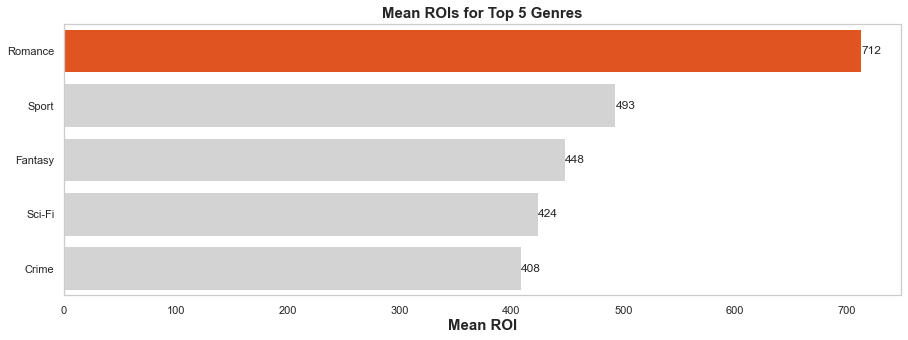

In [46]:
plt.figure(figsize = (15,5))
sns.set(font_scale = 1,style='whitegrid')
sns_plot = sns.barplot(x = analysis_genres1['mean'][:5],y = analysis_genres1.index[:5],
                       data=analysis_genres1, 
                       palette=set_custom_palette(analysis_genres1['mean'])) 
# i want to display values next to bars
for container in sns_plot.containers:       
    sns_plot.bar_label(container, fmt='%.0f')
plt.ylabel('')
plt.xlabel('Mean ROI', fontweight = "bold", fontsize = 15)
plt.title("Mean ROIs for Top 5 Genres", fontweight = "bold", fontsize = 15)
plt.grid(False)
sns_plot.figure.savefig("Top_5_Genres.png");

## Analyzing Studios

In [47]:
# l will only take necessary columns , and i will limit the data to last 10 years 
studios= studios[['movie','genres','studio','release_year','production_budget','ROI']]
studios= studios[studios['release_year'] >= 2012]
studios.sort_values(by= 'ROI', ascending = True ).head()

movie       genres studio  release_year  production_budget     ROI
221  Eden  Documentary     BG          2016            2300000 -100.00
226  Eden       Comedy     BG          2016            2300000 -100.00
225  Eden       Family     BG          2016            2300000 -100.00
224  Eden    Animation     BG          2016            2300000 -100.00
223  Eden        Drama     BG          2016            2300000 -100.00

In [48]:
#l will clean nan values
studios=studios[studios.genres != 'nan']

In [49]:
# get statistics for ROI grouped by studios, sort by mean, exclude studios who have made less than 10 movies 
analysis_studio = studios.groupby(['studio'])['ROI'].describe()
analysis_studio1=analysis_studio.sort_values(by=['mean'], ascending=False)
analysis_studio1=analysis_studio1[analysis_studio1['count'] >= 10]
analysis_studio1.head(10)

count    mean     std     min    25%    50%     75%      max
studio                                                               
WB (NL)  49.00 1452.55 5931.77  -22.02 119.20 217.24  382.04 41556.47
Uni.    136.00  874.48 1305.32  -81.36 123.96 312.34 1083.04  6336.42
Par.     57.00  525.33 1409.72  -50.69  54.87 171.41  332.19 10075.95
TriS     16.00  412.14  552.30   35.59 121.76 345.83  451.03  2365.84
LG/S     29.00  411.06  791.49 -100.00  16.35 154.38  323.98  2824.26
SPC      14.00  335.62  363.86  -90.00  28.68 262.48  615.96  1080.88
Wein.    50.00  311.61  454.80  -84.91  -2.74 117.91  475.71  1849.96
LGF      52.00  304.60  452.95  -75.25  61.10 177.78  293.80  2588.72
SGem     16.00  297.72  269.81  -40.58 105.67 241.73  452.61   844.78
BV       71.00  269.95  192.21  -76.33  98.59 299.12  383.74   748.31

In [50]:
# I will write function to show first 3 highest mean ROI in different color
def set_custom_palette1(mean, highest_ROI = 'orangered', other_color = 'lightgrey'):
    highest_ROI = 500
    pal = []
    
    for item in mean:
        if item >= highest_ROI:
            pal.append(highest_ROI)
        else:
            pal.append(other_color)
    return pal

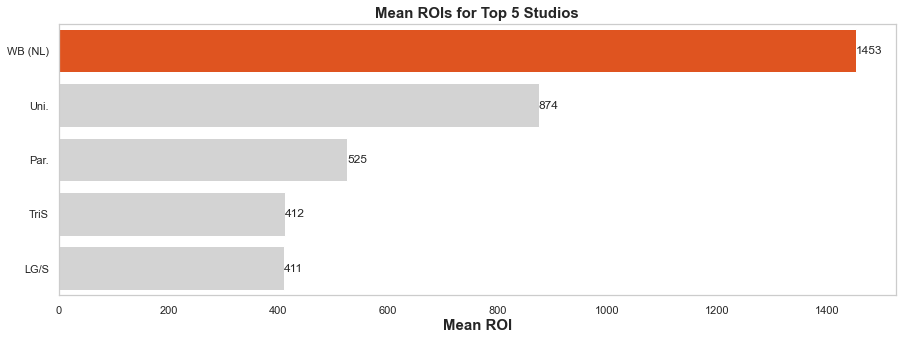

In [51]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1,style='whitegrid')
sns_plot = sns.barplot(x =analysis_studio1['mean'][:5], y = analysis_studio1.index[:5], 
            data=analysis_studio1, 
            palette=set_custom_palette(analysis_studio1['mean']))
for container in sns_plot.containers:
    sns_plot.bar_label(container, fmt= '%.0f')
plt.ylabel("")
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Mean ROIs for Top 5 Studios", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top_5_Studios.png");

Now I want to get into first studio who has lowest mean production budget. I want to see this studio lowest mean ROI by genre

In [52]:
WB = studios[studios['studio'] == 'WB (NL)']
stat_WB = WB.groupby(['genres'])['production_budget'].describe()
stat_WB1=stat_WB.sort_values(by=['mean'], ascending = True)
stat_WB1=stat_WB1[stat_WB1['count'] >= 3]
stat_WB1

count        mean          std         min         25%  \
genres                                                                
Romance       4.00 26525000.00  18089660.95   100000.00 22525000.00   
Biography     3.00 37333333.33   4618802.15 32000000.00 36000000.00   
Drama         9.00 37777777.78  30069826.15  5000000.00 20000000.00   
Fantasy       3.00 39333333.33  26857649.44 20000000.00 24000000.00   
Documentary   7.00 57285714.29  65081267.88  5000000.00 22500000.00   
Action        5.00 61600000.00 105784214.32  5000000.00  5000000.00   
Comedy        8.00 80562500.00 105307521.61  5000000.00 22625000.00   

                    50%         75%          max  
genres                                            
Romance     33000000.00 37000000.00  40000000.00  
Biography   40000000.00 40000000.00  40000000.00  
Drama       30000000.00 40000000.00 110000000.00  
Fantasy     28000000.00 49000000.00  70000000.00  
Documentary 37000000.00 59500000.00 195000000.00  
Action      20000000.00 28000000.00 250000000.00  
Comedy      34000000.00 90250000.00 250000000.00

In [53]:
def set_custom_palette2(mean, min_color = 'orangered', other_color = 'lightgrey'):
    min_value = min(mean)
    pal = []
    
    for item in mean:
        if item <= min_value:
            pal.append(min_color)
        else:
            pal.append(other_color)
    return pal

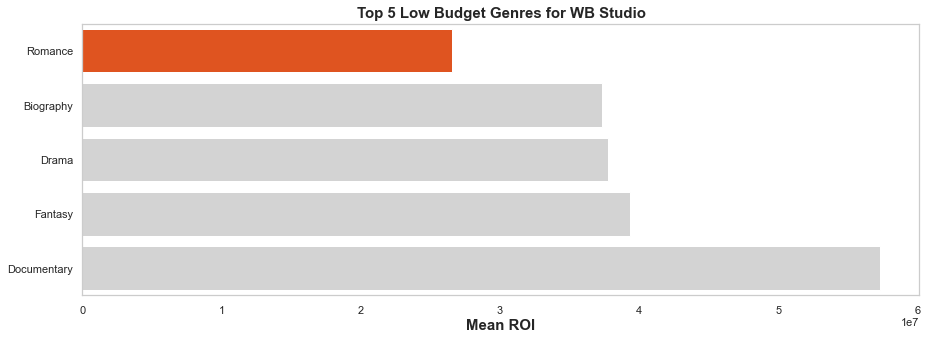

In [54]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1,style='whitegrid')
sns_plot = sns.barplot(x=stat_WB1['mean'][:5],y=stat_WB1.index[:5],
                       data=stat_WB1, 
                       palette=set_custom_palette2(stat_WB1['mean']))
plt.ylabel("")
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Top 5 Low Budget Genres for WB Studio", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top_5_Low_Budget_Genres_for_WB_Studio.png");

## Analyzing Directors

In [55]:
directors1.head()

tconst  directors    writers primary_title original_title  start_year  \
0  tt6857112  nm0938939  nm1443502            Us             Us        2019   
1  tt2708782  nm4409800  nm0429634            Us             Vi        2013   
2  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
3  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
4  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   

   runtime_minutes  genres  ordering     nconst  ...    primary_name  \
0           116.00   Drama      6.00  nm0089658  ...      Jason Blum   
1            92.00  Family      9.00  nm1079275  ...  Lars Gustafson   
2            85.00  Horror      7.00  nm0089658  ...      Jason Blum   
3            85.00  Horror      5.00  nm0218621  ...  James DeMonaco   
4            85.00  Horror      9.00  nm0298181  ...     Brad Fuller   

  birth_year death_year primary_profession  \
0    1969.00        NaN           director   
1    1974.00        NaN           director   
2    1969.00        NaN           director   
3    1969.00        NaN           director   
4        NaN        NaN           director   

                          known_for_titles  release_year      movie  \
0  tt1179904,tt7349662,tt2582802,tt5052448          2019         Us   
1  tt8338100,tt2309405,tt1859522,tt3580332          2019         Us   
2  tt1179904,tt7349662,tt2582802,tt5052448          2013  The Purge   
3  tt2184339,tt2975578,tt6133466,tt4094724          2013  The Purge   
4  tt1291150,tt6133466,tt2436386,tt6644200          2013  The Purge   

  worldwide_gross  production_budget     ROI  
0       254210310           20000000 1171.05  
1       254210310           20000000 1171.05  
2        91266581            3000000 2942.22  
3        91266581            3000000 2942.22  
4        91266581            3000000 2942.22  

[5 rows x 23 columns]

In [56]:
directors2=directors1[['primary_name','movie','genres','death_year','worldwide_gross','production_budget','ROI']]
directors2=directors2.rename(columns={"primary_name":"director"})
directors2.head()

director      movie  genres  death_year  worldwide_gross  \
0      Jason Blum         Us   Drama         NaN        254210310   
1  Lars Gustafson         Us  Family         NaN        254210310   
2      Jason Blum  The Purge  Horror         NaN         91266581   
3  James DeMonaco  The Purge  Horror         NaN         91266581   
4     Brad Fuller  The Purge  Horror         NaN         91266581   

   production_budget     ROI  
0           20000000 1171.05  
1           20000000 1171.05  
2            3000000 2942.22  
3            3000000 2942.22  
4            3000000 2942.22

In [57]:
directors2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 0 to 3789
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           3790 non-null   object 
 1   movie              3790 non-null   object 
 2   genres             3790 non-null   object 
 3   death_year         54 non-null     float64
 4   worldwide_gross    3790 non-null   int64  
 5   production_budget  3790 non-null   int64  
 6   ROI                3790 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 236.9+ KB


In [58]:
directors2['death_year'].value_counts()

2016.00    13
2017.00     8
2015.00     8
2008.00     3
2018.00     3
1996.00     2
2013.00     2
2014.00     2
2012.00     1
1973.00     1
1963.00     1
2009.00     1
1968.00     1
2000.00     1
1993.00     1
2010.00     1
1952.00     1
1919.00     1
2003.00     1
2011.00     1
1999.00     1
Name: death_year, dtype: int64

In [59]:
directors3 = directors2[directors2['death_year'].isnull()]
directors3

director           movie       genres  death_year  \
0          Jason Blum              Us        Drama         NaN   
1      Lars Gustafson              Us       Family         NaN   
2          Jason Blum       The Purge       Horror         NaN   
3      James DeMonaco       The Purge       Horror         NaN   
4         Brad Fuller       The Purge       Horror         NaN   
...               ...             ...          ...         ...   
3785  Sati Janibekyan   Head of State      Romance         NaN   
3786      Kana Yamada    Midnight Run        Drama         NaN   
3787  Mihajlo Obrenov         Contact  Documentary         NaN   
3788       Annie Laks  The Guilt Trip    Adventure         NaN   
3789   Logan Williams        Aberdeen  Documentary         NaN   

      worldwide_gross  production_budget     ROI  
0           254210310           20000000 1171.05  
1           254210310           20000000 1171.05  
2            91266581            3000000 2942.22  
3            91266581            3000000 2942.22  
4            91266581            3000000 2942.22  
...               ...                ...     ...  
3785         38283765           35200000    8.76  
3786         81613606           30000000  172.05  
3787        165900000           90000000   84.33  
3788         41294674           40000000    3.24  
3789            64148            6500000  -99.01  

[3736 rows x 7 columns]

I was going to filtre for the directors who are still alive to make recommendation on directors.But unfurtunately there was no enough data for death year. There was only 54 death_year datas in about 3790 director datas.

In [60]:
# I will drop this column because it's not useful
directors2 = directors2.drop('death_year', axis=1)

In [61]:
analysis_director = directors2.groupby(['director'])['ROI'].describe()
analysis_director1=analysis_director.sort_values(by=['mean'], ascending=False)
analysis_director1= analysis_director1[analysis_director1['count'] >= 5]
analysis_director1.head(10)

count    mean     std     min     25%     50%     75%  \
director                                                                        
Jason Blum              42.00 2635.41 6414.87 -100.00  468.86 1105.83 2563.49   
Christopher Landon       7.00 2478.48 1993.85    3.70 1165.60 2400.21 3398.58   
Jackie Earle Haley       5.00 2285.54 4292.30  -94.48   68.91  236.37 1316.92   
Brad Fuller              7.00 1446.51  891.98  174.25 1018.02 1139.28 1916.90   
Cate Blanchett          12.00  978.81 2527.34  -14.40  124.49  290.38  393.58   
Christopher Meledandri   5.00  727.66  613.50   41.69  199.46  745.94 1183.18   
Shailene Woodley         6.00  612.47  947.72  -29.24   93.23  200.70  639.34   
Robert Mark Kamen        6.00  572.40  361.46   80.74  308.26  661.09  769.47   
Jada Pinkett Smith       5.00  545.28  366.10   93.46  403.17  415.12  779.44   
Teresa Palmer            7.00  533.29 1043.46  -60.12   31.47  248.05  303.00   

                            max  
director                         
Jason Blum             41556.47  
Christopher Landon      5817.07  
Jackie Earle Haley      9900.00  
Brad Fuller             2942.22  
Cate Blanchett          8989.36  
Christopher Meledandri  1468.02  
Shailene Woodley        2459.72  
Robert Mark Kamen       1035.19  
Jada Pinkett Smith      1035.19  
Teresa Palmer           2876.13

In [62]:
def set_custom_palette3(mean, max_value = 'orangered', other_color = 'lightgrey'):
    highest_ROI = 1500
    pal = []
    
    for item in mean:
        if item >= highest_ROI:
            pal.append(max_value)
        else:
            pal.append(other_color)
    return pal

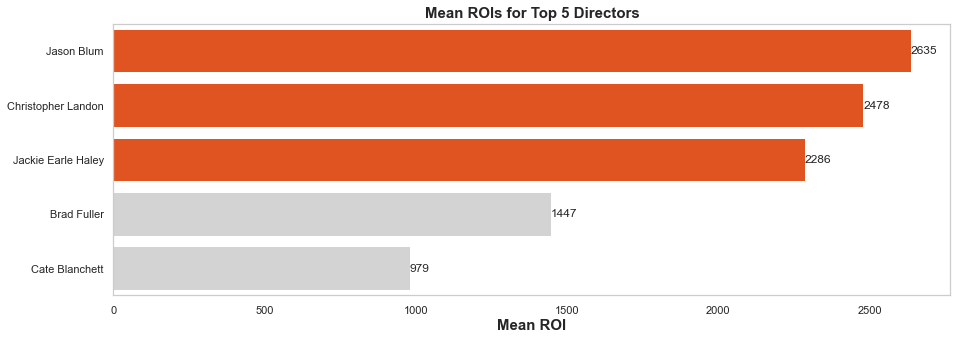

In [63]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1,style='whitegrid')
sns_plot = sns.barplot(x=analysis_director1['mean'][:5],y=analysis_director1.index[:5],
                       data=analysis_director1, 
                       palette=set_custom_palette3(analysis_director1['mean']))
for container in sns_plot.containers:
    sns_plot.bar_label(container, fmt='%.0f')
plt.ylabel("")
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Mean ROIs for Top 5 Directors", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top_5_Directors.png");

In [64]:
Jason_Blum = directors2[directors2['director'] == 'Jason Blum']
Jason_top_5=Jason_Blum.sort_values(by = 'ROI' , ascending = False).head()
Jason_top_5

director                  movie       genres  worldwide_gross  \
26   Jason Blum            The Gallows      Romance         41656474   
110  Jason Blum              Insidious      Romance         99870886   
120  Jason Blum                  Benji       Comedy         31559560   
5    Jason Blum  Paranormal Activity 2  Documentary        177512032   
127  Jason Blum                  Split        Drama        278964806   

     production_budget      ROI  
26              100000 41556.47  
110            1500000  6558.06  
120             500000  6211.91  
5              3000000  5817.07  
127            5000000  5479.30

In [65]:
def set_custom_palette2(mean, max_color = 'orangered', other_color = 'lightgrey'):
    high_ROI = 6500
#     max_val = mean.max()
    pal = []
    
    for item in mean:
        if item >= high_ROI:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

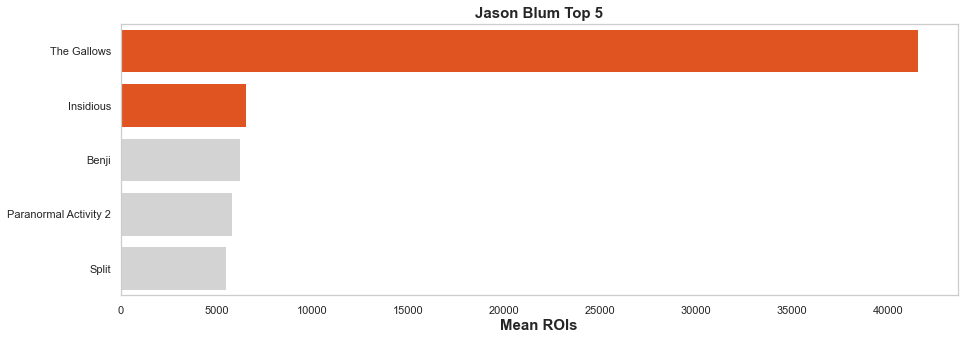

In [66]:
plt.figure(figsize=(15,5))
sns.set(font_scale = 1,style='whitegrid')
sns_plot = sns.barplot(x=Jason_top_5['ROI'],y=Jason_top_5['movie'], color = 'lightcoral',
                      data=Jason_top_5,
                      palette=set_custom_palette2(Jason_top_5['ROI']))
plt.ylabel("")
plt.xlabel("Mean ROIs", fontweight= "bold", fontsize=15)
plt.title("Jason Blum Top 5", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Jason_Blum_Top_5.png");

# Conclusions

According to the above my analysis, here are my recommendations for Microsoft as they begin to work on their new movie studio. I will make three recommendation for each category.

**#1**: First of all for genre category , I will recommend 'Romance' genres. It looks like , it is a good idea start with 'Romance' genre. If we look at the highest mean ROI according to my analysis, Romance genre has the highest mean ROI. Second one is follow with 'Sport' genre and if we compare the result of Romance genre and Sport genre there is pretty much difference between the numbers.
And also if we look at the director who has the highest mean ROI,Jason Blum's first two highest ROI movies is Romance genre.

**#2**: My second recommendation will be for directors. My analysis shows that the director who has the highest mean ROI is Jason Blum.And also while checking the numbers according to datas Jason Blum made about 42 movies, He has pretty low mean production budget.it might be good idea to start working with on Microsoft's new studio.

**#3**: My third recommendation will be for the studio. As we can see the one who has highest ROI is Warner Bros. WB studio's most succesfull genre is Romance as well. And if we deep into avarage production budget by genre we can see that Romance genre also has the lowest  avarage budget.And of course Microsoft will be one of the studios in the market but WB's strategies can be implemented during creating movie by Microsoft.It can be considerable in terms of releasing succesful movie.



# Next Steps

Further analyses could yield additional insights for Microsoft's Movie Studios

**1)** I would next like to analyze the correlations between the genres and directors in these categories. For example, which directors have the highest mean ROI when working with certain genres

**2)** I would like to see is there a correlation between production budget and studios. For example budget range might affect movie's success

**3)** What other metrics determine success aside from Profits and ROI What affect does a movie's ratings or the number of times it has been viewed?

